In [220]:
#Wyctor Fogos da Rocha - 17/03/2020

!pip install networkx
!pip install scikit-fuzzy

In [221]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [222]:
cadencia= ctrl.Antecedent(np.arange(0, 210, 1), 'cadencia') 
velocidade=ctrl.Antecedent(np.arange(0,4,1), 'velocidade')
largura=ctrl.Antecedent(np.arange(0,4,1), 'largura')
comprimento=ctrl.Antecedent(np.arange(0,4,1), 'comprimento')

#Resultado dos valores de entrada
resultado=ctrl.Consequent(np.arange(0, 10, 1), 'Movimento')

In [223]:
# Cria as funções de pertinência usando tipos variados
        velocidade['lenta'] = fuzz.trimf(velocidade.universe, [0, 0, 1])
        velocidade['normal'] = fuzz.trimf(velocidade.universe, [0, 1, 2]) #fuzz.gaussmf(cadencia.universe, 5, 2)
        velocidade['rápido'] = fuzz.trapmf(velocidade.universe, [1, 2, 3, 3])

        # Cria as funções de pertinência usando tipos variados
        cadencia['baixa'] = fuzz.trimf(cadencia.universe, [0, 0, 110])
        cadencia['normal'] = fuzz.trimf(cadencia.universe, [0, 110, 220]) #fuzz.gaussmf(cadencia.universe, 5, 2)
        cadencia['alta'] = fuzz.trimf(cadencia.universe, [110, 220, 330]) #fuzz.gaussmf(cadencia.universe, 100,30)

        largura['pequena'] = fuzz.trimf(largura.universe, [0, 0, 1])
        largura['normal'] = fuzz.trimf(largura.universe, [0, 1, 2]) 
        largura['grande'] = fuzz.trimf(largura.universe, [1, 2, 3]) 

        comprimento['pequeno'] = fuzz.trimf(comprimento.universe, [0, 0, 1])
        comprimento['normal'] = fuzz.trimf(comprimento.universe, [0, 1, 2]) 
        comprimento['grande'] = fuzz.trimf(comprimento.universe, [1, 2, 3]) 

        resultado['errado'] = fuzz.trimf(resultado.universe, [0, 0, 5]) 
        #resultado['indefinido'] = fuzz.trimf(resultado.universe, [0, 5, 9])
        resultado['certo'] = fuzz.trimf(resultado.universe, [5, 9, 9]) 
        

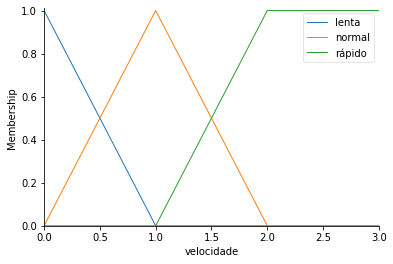

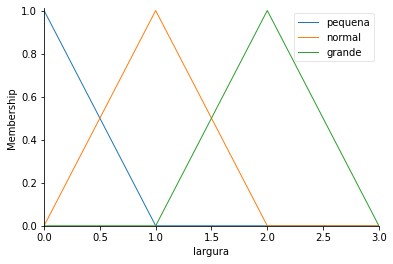

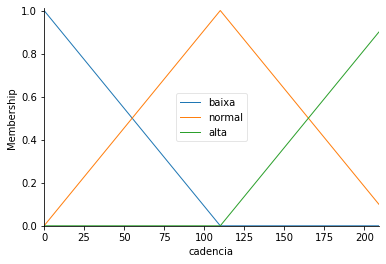

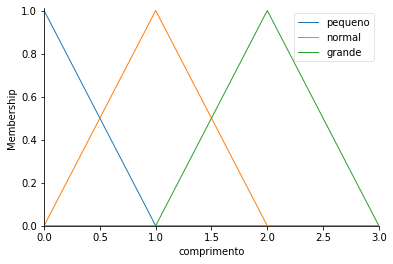

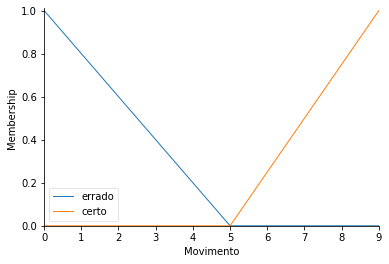

In [224]:
velocidade.view()
largura.view()
cadencia.view()
comprimento.view()
resultado.view()


In [225]:
rule1 = ctrl.Rule(velocidade['normal'] & cadencia['normal'] & largura['normal'] & comprimento['normal'], resultado['certo'])
rule2 = ctrl.Rule(velocidade['rápido'] & cadencia['alta'] & largura['normal'] & comprimento['normal'],resultado['certo'])
#rule3 = ctrl.Rule(velocidade['rápido'] & cadencia['normal'] & largura['normal'] & comprimento['grande'],resultado['indefinido'])
rule4 = ctrl.Rule(velocidade['lenta'] & cadencia['baixa'], resultado['errado'])
#rule5 = ctrl.Rule(velocidade['rápido'] & cadencia['alta'], resultado['indefinido'])
rule6 = ctrl.Rule(largura['pequena'] | comprimento['pequeno'], resultado['errado'])
rule7 = ctrl.Rule(largura['grande'] | comprimento['grande'], resultado['errado'])
rule8 = ctrl.Rule(velocidade['normal'] & cadencia['baixa'] & largura['normal'] & comprimento['normal'],resultado['certo'])
rule9 = ctrl.Rule(velocidade['lenta'] & cadencia['baixa'] & largura['pequena'] & comprimento['pequeno'],resultado['errado'])


In [226]:
movimento_ctrl = ctrl.ControlSystem([rule1, rule2, rule4, rule6, rule7, rule8, rule9])
movimento_simulador = ctrl.ControlSystemSimulation(movimento_ctrl)

In [230]:
# Entrando com alguns valores para qualidade da comida e do serviço
movimento_simulador.input['velocidade'] = (2.29/1.37)
movimento_simulador.input['cadencia'] = (72) #cadencia_medido
movimento_simulador.input['largura']=  (0.1897/0.185)
movimento_simulador.input['comprimento']=  (0.91/0.72) #((statistics.mean(comprimento_stance)+statistics.mean(comprimento_swing))/0.72)

# Computando o resultado
movimento_simulador.compute()    
print(movimento_simulador.output['Movimento'])
        


4.6929677961179195


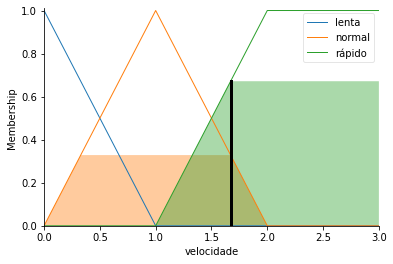

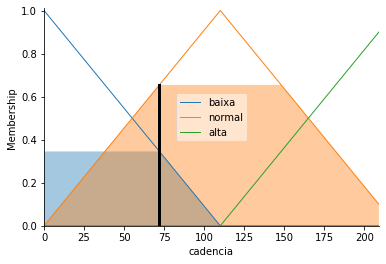

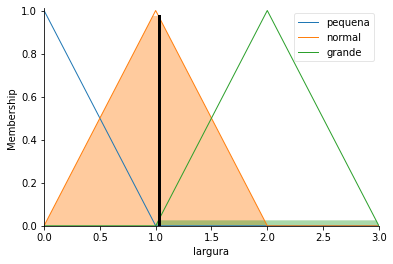

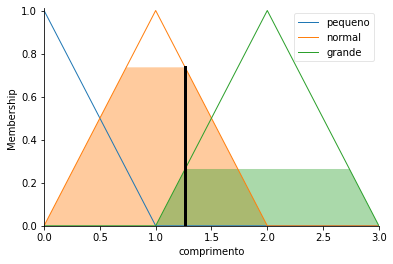

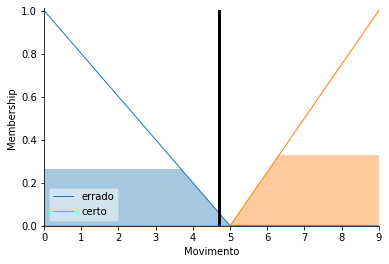

In [231]:

velocidade.view(sim=movimento_simulador)
cadencia.view(sim=movimento_simulador)
largura.view(sim=movimento_simulador)
comprimento.view(sim=movimento_simulador)
resultado.view(sim=movimento_simulador)